# Business Problem 

This is a dataset from one bank in the United States. Besides usual services, this bank also provides car insurance services. The bank organizes regular campaigns to attract new clients. The bank has potential customers’ data, and bank’s employees call them for advertising available car insurance options.

We are provided with general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns (attributes like previous attempts, outcome).

You have data about 4000 customers who were contacted during the last campaign and for whom the results of campaign (did the customer buy insurance or not) are known.

# Task and Approach 

The task is to predict for 1000 customers who were contacted during the current campaign, whether they will buy car insurance or not.

We will be using SVM(Support vector machine) to predict it

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading a csv file
train_df = pd.read_csv('carInsurance_train.csv')

In [3]:
#Dimension of a dataframe
train_df.shape

(4000, 19)

In [4]:
#First 10 rows of a train dataframe
train_df.head(10)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
5,6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1
6,7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,13:00:02,13:03:17,1
7,8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,NaN,15:39:43,15:40:49,0
8,9,30,admin.,married,secondary,0,187,1,0,cellular,18,nov,1,-1,0,NaN,12:20:56,12:22:42,0
9,10,30,blue-collar,married,secondary,0,3,1,1,cellular,12,may,2,-1,0,NaN,09:22:20,09:27:46,0


In [5]:
#Data type of all columns
train_df.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [6]:
#Remove some unnecessary columns
train_df.drop(['Id', 'CallStart', 'CallEnd'], axis=1, inplace=True)
train_df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,0
1,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,0
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,1
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,1
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,0


## Exploratory Data Analysis(EDA)

In [7]:
#Summary of Numerical variables
train_df.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [8]:
#Summary of categorical variables
train_df.describe(include=np.object)

,Job,Marital,Education,Communication,LastContactMonth,Outcome
count,3981,4000,3831,3098,4000,958
unique,11,3,3,2,12,3
top,management,married,secondary,cellular,may,failure
freq,893,2304,1988,2831,1049,437


### Univariate Analysis

#### Histogram of Age variable

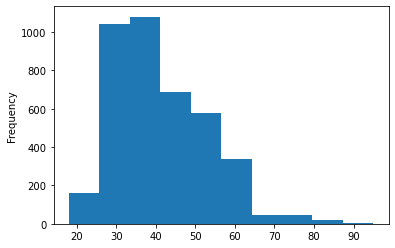

In [9]:
train_df['Age'].plot.hist()

#### Histogram of Balance variable

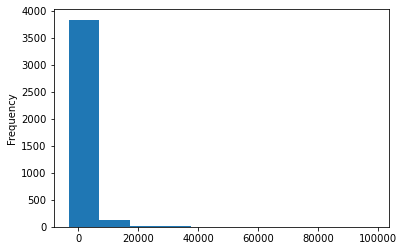

In [10]:
train_df['Balance'].plot.hist()

#### Histogram of NoOfContacts variable

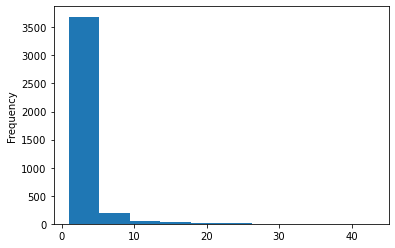

In [11]:
train_df['NoOfContacts'].plot.hist()

#### Histogram of LastContactDay variable 

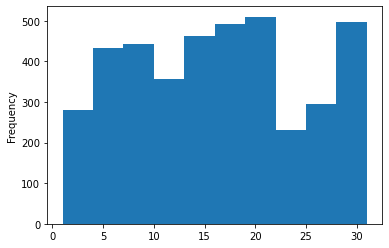

In [12]:
train_df['LastContactDay'].plot.hist()

#### Histogram of DaysPassed variable

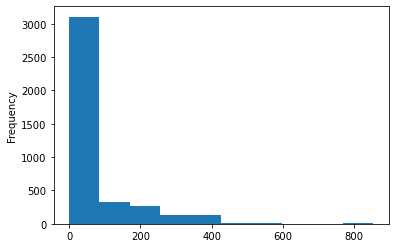

In [13]:
train_df['DaysPassed'].plot.hist()

#### Histogram of PrevAttemps variable

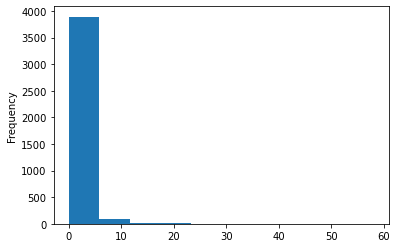

In [14]:
train_df['PrevAttempts'].plot.hist()

#### Bar-plot of Default variable

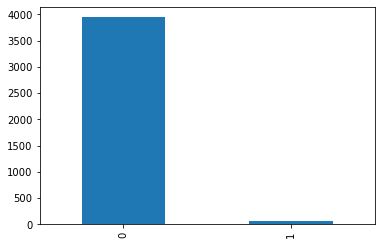

In [15]:
train_df['Default'].value_counts().plot.bar()

#### Bar-plot of CarLoan variable

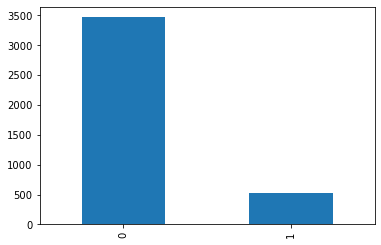

In [16]:
train_df['CarLoan'].value_counts().plot.bar()

#### Bar-plot of HHInsurance variable 

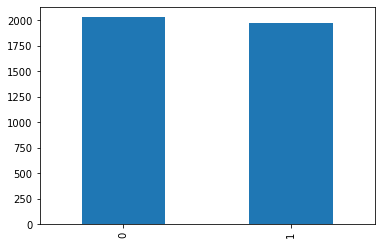

In [17]:
train_df['HHInsurance'].value_counts().plot.bar()

#### Bar-plot of CarInsurance variable

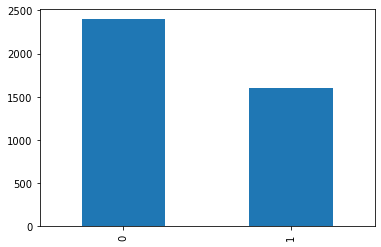

In [18]:
train_df['CarInsurance'].value_counts().plot.bar()

#### Bar-plot of Job variable 

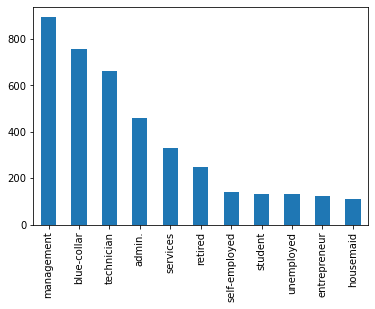

In [19]:
train_df['Job'].value_counts().plot.bar()

#### Bar-plot of Marital variable

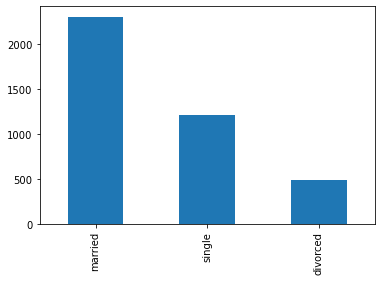

In [20]:
train_df['Marital'].value_counts().plot.bar()

#### Bar-plot of Education variable 

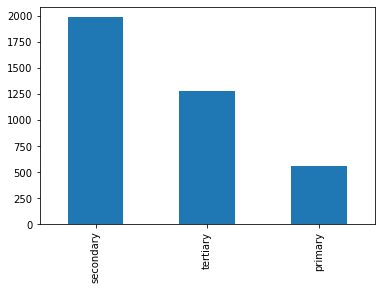

In [21]:
train_df['Education'].value_counts().plot.bar()

#### Bar-plot of Communication variable 

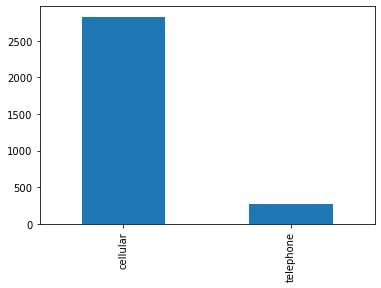

In [22]:
train_df['Communication'].value_counts().plot.bar()

#### Bar-plot of LastContactMonth variable 

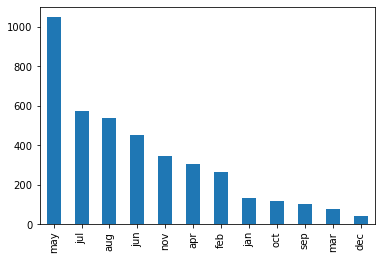

In [23]:
train_df['LastContactMonth'].value_counts().plot.bar()

#### Bar-plot of LastContactDay variable 

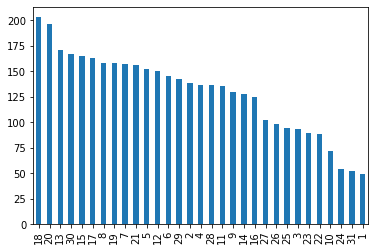

In [24]:
train_df['LastContactDay'].value_counts().plot.bar()

#### Bar-plot of Outcome variable

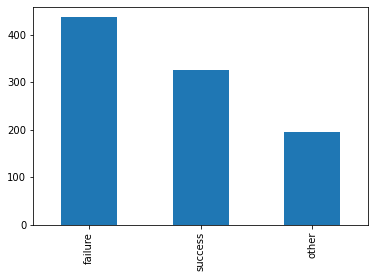

In [25]:
train_df['Outcome'].value_counts().plot.bar()

#### Box-plot of Age variable

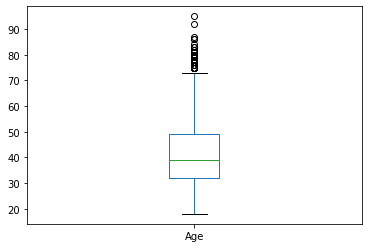

In [26]:
train_df['Age'].plot.box()

We can see that in above box-plot there are some outliers. we will replace these outliers by the mean of Age variable.
We assign mean of Age variable to those records whose having Age greater than 72.

In [27]:
train_df.loc[train_df['Age']>72,'Age'] = np.mean(train_df['Age'])

Checking if we have any outliers left in the Age variable.

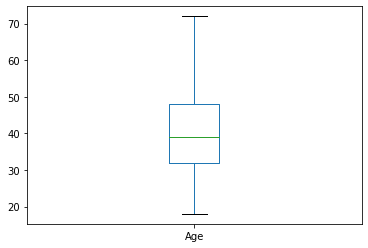

In [28]:
train_df['Age'].plot.box()

We can see in the above graph that now we don't have any ouliers in the Age variable.

#### Cross-tab table for CarInsurance(Target) variable

In [29]:
pd.crosstab(train_df['CarInsurance'], columns='N', normalize=True)

col_0,N
CarInsurance,
0,0.599
1,0.401


**The data seems to be quiet good as we have approx. 40% of 1's in our data**

### Bivariate Analysis 

In [30]:
#Separate numerical columns and categorical columns 
num_cols = train_df.select_dtypes(include=np.number).columns.tolist()    #Numerical columns
cat_cols = train_df.select_dtypes(include='object').columns.tolist()     #Categorical columns

In [31]:
print("Numerical columns : ", num_cols)
print("Categorical columns : ", cat_cols)

Numerical columns :  ['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance']
Categorical columns :  ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']


We won't use CarLoan, HHInsurance and Default variables to plot box-plot which is based on CarInsurance. Because CarLoan, HHInsurance and Default are dummies variables

#### Box-plot of all numerical and non-dummies variables based on CarInsurance variable

Age                    AxesSubplot(0.1,0.679412;0.363636x0.220588)
Balance           AxesSubplot(0.536364,0.679412;0.363636x0.220588)
DaysPassed             AxesSubplot(0.1,0.414706;0.363636x0.220588)
LastContactDay    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
NoOfContacts               AxesSubplot(0.1,0.15;0.363636x0.220588)
PrevAttempts          AxesSubplot(0.536364,0.15;0.363636x0.220588)
dtype: object

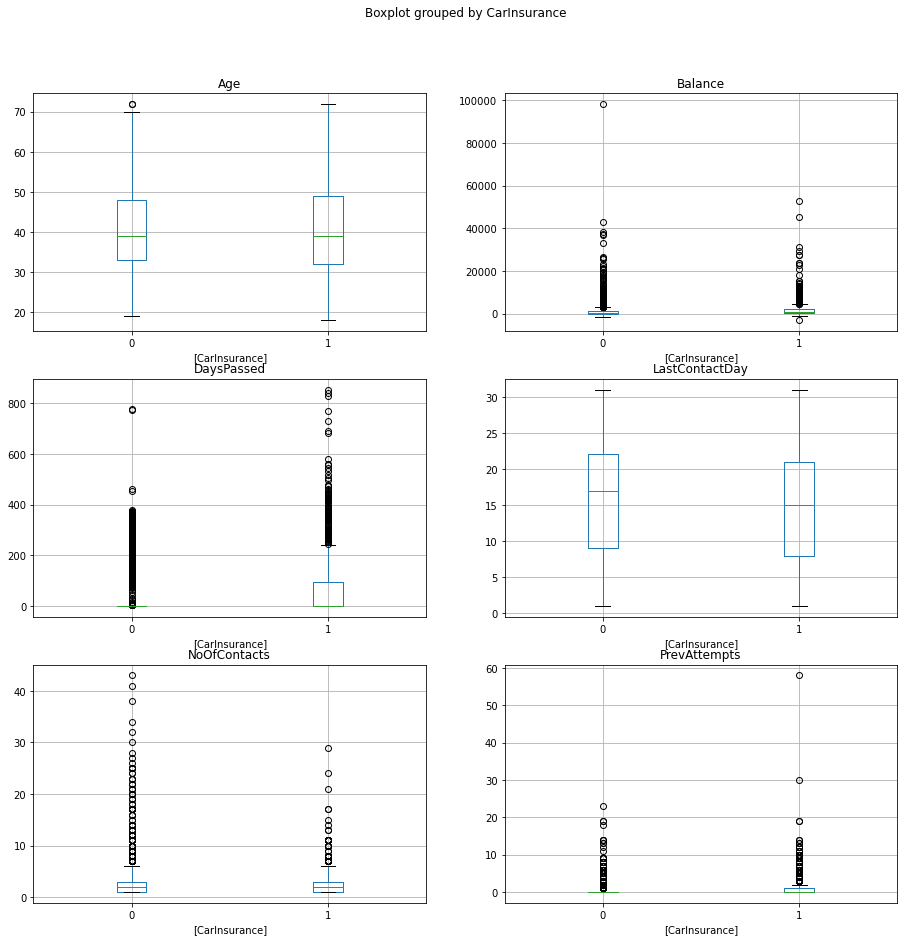

In [32]:
num_cols_without_dummies = ['Age','Balance','DaysPassed','LastContactDay','NoOfContacts','PrevAttempts']
fig, axes = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(15, 15))
train_df.loc[:, ['CarInsurance']+num_cols_without_dummies].boxplot(by='CarInsurance', ax=axes, return_type='axes')

#### The "LastContactDay" boxplot clearly shows that longer since the last contact higher the chance that the person will not buy the Insurance 

#### The "DaysPassed" boxplot shows that higher the number of days passes higher the chance that the person will buy the Insurance

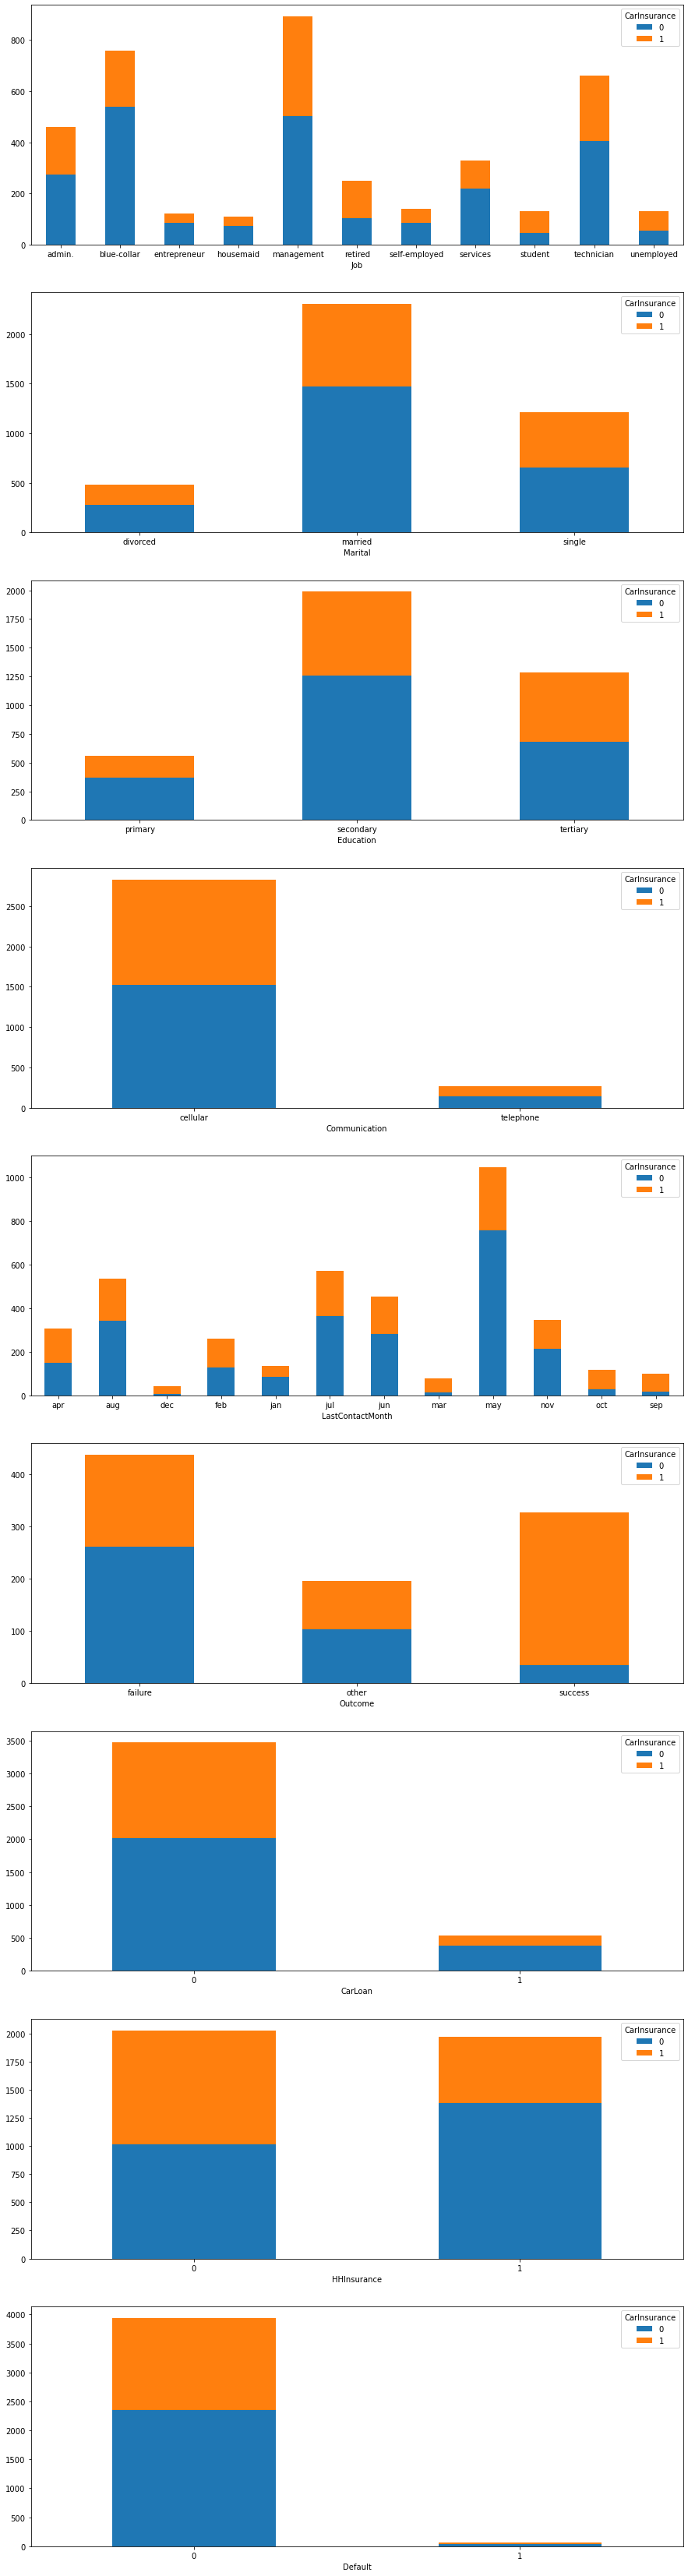

In [33]:
#Plot stacked bar chart for all categorical and dummies columns
cat_dummy_cols = cat_cols + ['CarLoan', 'HHInsurance', 'Default']

fig, axes = plt.subplots(len(cat_dummy_cols), sharex=False, sharey=False, figsize=(15, 60))
for i in range(len(cat_dummy_cols)):
    pd.crosstab(train_df[cat_dummy_cols[i]], train_df['CarInsurance']).plot(kind='bar',
                                                                           stacked=True,
                                                                           grid=False,
                                                                           ax=axes[i],
                                                                           rot=0,
                                                                           )

The JobType='Retired' seem to have higher chance of buying insurance.

The Communication='cellular' seem to best way to reach out for carinsurance.

### Missing value Treatment(Checking for missing values)

In [34]:
train_df.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CarInsurance           0
dtype: int64

#### Looks like variables Job, Education, Communication & Outcome have missing values. Lets analyse them and treat them accordingly

#### Handling missing values in Job variable

In [35]:
#Viewing frequency distribution of Job variable
train_df['Job'].value_counts(dropna=False)

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
NaN               19
Name: Job, dtype: int64

There are 19 missing values in the 'Job' variable. Let's replace the missing with None. This will help us in handling missing values in future as well.

In [36]:
train_df['Job'].fillna('None', inplace=True)
train_df['Job'].isnull().sum()

0

#### Handling missing values in Education variable

In [37]:
train_df['Education'].value_counts(dropna=False)

secondary    1988
tertiary     1282
primary       561
NaN           169
Name: Education, dtype: int64

#### Fill missing values in Education variable with the most common education level by job type 

 Now according to the job type we will crate a mapping where the job and mode of education is there.
 
 It means when there are many people in the management job then most of them are in which education.
 
 We can find that in below mapping

In [38]:
#Create job-education level mode mapping
edu_mode = []
#Job types
job_types = train_df.Job.value_counts().index

for job in job_types:
    mode = train_df[train_df.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode, mode)
edu_map = pd.Series(edu_mode, index=train_df.Job.value_counts().index)
edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
student          secondary
unemployed       secondary
entrepreneur      tertiary
housemaid          primary
None             secondary
dtype: object

In [39]:
# Apply the mapping to missing eductaion observation. We will replace education now by jobs value
for j in job_types:
    train_df.loc[(train_df['Education'].isnull()) & (train_df['Job']==j),'Education'] = edu_map.loc[edu_map.index == j][0]
    
# For those who are not getting mapped we will create a new category as None
train_df['Education'].fillna('None',inplace=True)
# Checking if we have any missing values left in Education variable
train_df['Education'].isnull().sum()

0

#### Handling missing values in communication variable

In [40]:
#Checking for a missing values in communication variable
train_df['Communication'].value_counts(dropna=False)

cellular     2831
NaN           902
telephone     267
Name: Communication, dtype: int64

There are 902 missing values in Communication variable

In [41]:
#Filling missing values in the Communication variables with None
train_df['Communication'].fillna('None', inplace=True)

In [42]:
#Checking if we have any missing values left
train_df['Communication'].value_counts(dropna=False)

cellular     2831
None          902
telephone     267
Name: Communication, dtype: int64

#### Missing values in Outcome variable

In [43]:
#Check for a missing values in Outcome variable
train_df['Outcome'].value_counts(dropna=False)

NaN        3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

Fill missing outcome as not in previous campaign, we are adding one category to Outcome.

We will add category if the value of DaysPassed is -1

In [44]:
train_df.loc[train_df['DaysPassed'] == -1, 'Outcome'] = 'NoPrev'
train_df['Outcome'].value_counts(dropna=False)

NoPrev     3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

In [45]:
#Check if we have any missing values left
train_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CarInsurance        0
dtype: int64

Now we don't have any missing values

In [46]:
#Viewing first 5 records
train_df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
0,32.0,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NoPrev,0
1,32.0,blue-collar,married,primary,0,1156,1,0,None,26,may,5,-1,0,NoPrev,0
2,29.0,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,1
3,25.0,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NoPrev,1
4,30.0,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NoPrev,0


In [47]:
#Numerical columns
train_df[num_cols].head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,32.0,0,1218,1,0,28,2,-1,0,0
1,32.0,0,1156,1,0,26,5,-1,0,0
2,29.0,0,637,1,0,3,1,119,1,1
3,25.0,0,373,1,0,11,2,-1,0,1
4,30.0,0,2694,0,0,3,1,-1,0,0


In [48]:
#Categorical columns
train_df[cat_cols].head()

,Job,Marital,Education,Communication,LastContactMonth,Outcome
0,management,single,tertiary,telephone,jan,NoPrev
1,blue-collar,married,primary,None,may,NoPrev
2,management,single,tertiary,cellular,jun,failure
3,student,single,primary,cellular,may,NoPrev
4,management,married,tertiary,cellular,jun,NoPrev


In [49]:
#Create dummies columns from categorical columns
dummy_df = pd.get_dummies(train_df[cat_cols])
dummy_df.head()

,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [50]:
#Concat dummy dataframe and numerical dataframe
final_df = pd.concat([dummy_df, train_df[num_cols]], axis=1)
final_df.shape

(4000, 47)

In [51]:
#First 10 rows of our final dataframe
final_df.head(10)

,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,...,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,0,0,0,0,0,1,0,0,0,0,...,32.0,0,1218,1,0,28,2,-1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,32.0,0,1156,1,0,26,5,-1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,29.0,0,637,1,0,3,1,119,1,1
3,0,0,0,0,0,0,0,0,0,1,...,25.0,0,373,1,0,11,2,-1,0,1
4,0,0,0,0,0,1,0,0,0,0,...,30.0,0,2694,0,0,3,1,-1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,32.0,0,1625,0,0,22,1,109,1,1
6,0,1,0,0,0,0,0,0,0,0,...,37.0,0,1000,1,0,17,1,-1,0,1
7,0,0,0,0,0,1,0,0,0,0,...,35.0,0,538,1,0,12,4,-1,0,0
8,0,1,0,0,0,0,0,0,0,0,...,30.0,0,187,1,0,18,1,-1,0,0
9,0,0,1,0,0,0,0,0,0,0,...,30.0,0,3,1,1,12,2,-1,0,0


In [52]:
#Checking if there are missing values before we create model
final_df.isnull().sum(axis = 0)

Job_None                   0
Job_admin.                 0
Job_blue-collar            0
Job_entrepreneur           0
Job_housemaid              0
Job_management             0
Job_retired                0
Job_self-employed          0
Job_services               0
Job_student                0
Job_technician             0
Job_unemployed             0
Marital_divorced           0
Marital_married            0
Marital_single             0
Education_primary          0
Education_secondary        0
Education_tertiary         0
Communication_None         0
Communication_cellular     0
Communication_telephone    0
LastContactMonth_apr       0
LastContactMonth_aug       0
LastContactMonth_dec       0
LastContactMonth_feb       0
LastContactMonth_jan       0
LastContactMonth_jul       0
LastContactMonth_jun       0
LastContactMonth_mar       0
LastContactMonth_may       0
LastContactMonth_nov       0
LastContactMonth_oct       0
LastContactMonth_sep       0
Outcome_NoPrev             0
Outcome_failur

In [53]:
#Separate Independent columns and Dependent column
X = final_df.drop('CarInsurance', axis=1)
y = final_df['CarInsurance']

In [54]:
#Create Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11)

### Implement SVM(Support Vector Machine)

In [55]:
#Define model parameters to tune
model_parameters = {
    'C' : [1, 10, 100, 1000],
    'class_weight': ['balanced'],
    'gamma' : [0.1, 0.01, 0.001, 0.0001]
}

In [56]:
#Use GridSearch to find the best parameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
gscv = GridSearchCV(estimator=svc,
                   param_grid=model_parameters,
                   cv=5,
                   verbose=1,
                   n_jobs=-1,
                   scoring='f1'
                   )
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 15.7min finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'class_weight': ['balanced'],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [57]:
print("The best parameters are : ", gscv.best_params_)

The best parameters are :  {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.0001}


In [58]:
#Create a svc model with the best parameters
svc = SVC(**gscv.best_params_, probability=True)
svc.fit(X_train, y_train)

SVC(C=1000, class_weight='balanced', gamma=0.0001, probability=True)

In [59]:
#Making a predictions
test_pred = svc.predict(X_test)

### Evaluating our model

In [60]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
print("Accuracy Score : ", accuracy_score(y_test, test_pred))
print("Precision Score : ", precision_score(y_test, test_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, test_pred))
print("Classification Report : \n", classification_report(y_test, test_pred))

Accuracy Score :  0.58375
Precision Score :  0.4820359281437126
Confusion Matrix : 
 [[306 173]
 [160 161]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       479
           1       0.48      0.50      0.49       321

    accuracy                           0.58       800
   macro avg       0.57      0.57      0.57       800
weighted avg       0.59      0.58      0.59       800



In [61]:
from sklearn.metrics import roc_auc_score, roc_curve
#Define function to plot ROC curve
def plot_roc_curve(y_train_actual, train_pred_prob, y_test_actual, test_pred_prob, *args):
    '''
    Generate the train and test roc curve
    '''
    AUC_Train = roc_auc_score(y_train_actual, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_actual, test_pred_prob)
    if len(args) == 0:
        print("Train AUC : ", AUC_Train)
        print("Test AUC : ", AUC_Test)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_test, tpr_test, thresholds = roc_curve(y_test_actual, test_pred_prob)
        roc_plot(fpr, tpr, fpr_test, tpr_test)
    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC : ", AUC_Train)
        print("Test AUC : ", AUC_Test)
        print("Validation AUC : ", AUC_Valid)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_test, tpr_test, thresholds = roc_curve(y_test_actual, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr, tpr, fpr_test, tpr_test, fpr_val, tpr_val)

In [62]:
def roc_plot(fpr, tpr, fpr_test, tpr_test, *args):
    '''
    Generate ROC plot
    '''
    fig = plt.plot(fpr, tpr, label='Train')
    fig = plt.plot(fpr_test, tpr_test, label='Test')
    if len(args) == 0:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC curve using')
        plt.xlabel('False Positive Rate(1 - Specificity)')
        plt.ylabel('True Positive Rate(Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()
    else:
        fig = plt.plot(args[0], args[1], label='Validation')
        plt.xlabel([0.0, 1.0])
        plt.ylabel([0.0, 1.0])
        plt.title('ROC curve using')
        plt.xlabel('False Positive Rate(1 - Specificity)')
        plt.ylabel('True Positive Rate(Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

Train AUC :  0.9393161892750225
Test AUC :  0.6063059723333268


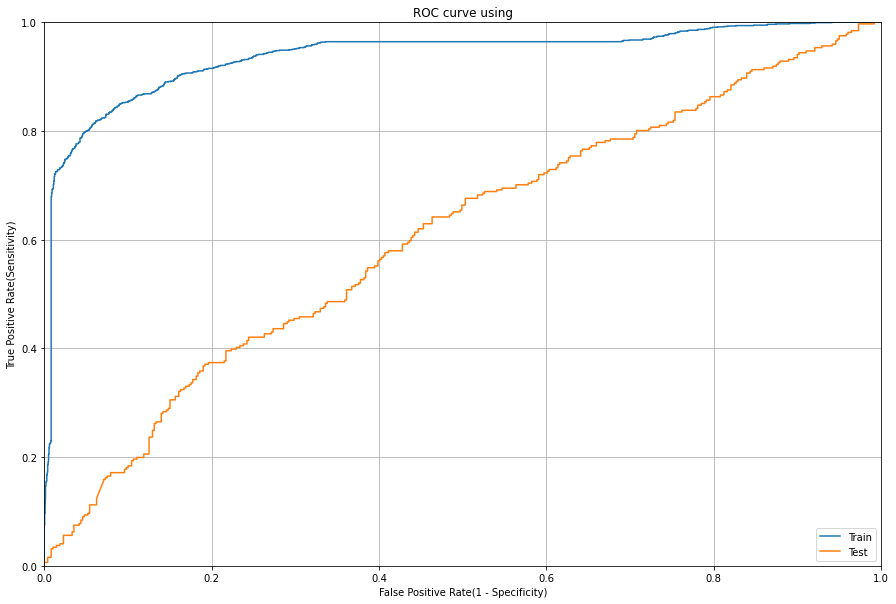

In [63]:
#Plotting ROC
plt.subplots(figsize=(15, 10))
train_prob = svc.predict_proba(X_train)[:, 1]
test_prob = svc.predict_proba(X_test)[:, 1]
plot_roc_curve(y_train, train_prob, y_test, test_prob)

In [64]:
#Save the variables used in the model as it will be required in future for new datasets prediction
svc.variables = X_train.columns

### Save our model

In [65]:
import joblib
joblib.dump(svc, 'svc_model.joblib')

['svc_model.joblib']

### Apply Model on Test Data

#### This part shows how to use the saved model on new datasets which would come in future for scoring

In [66]:
#Loading a saved model
svc_model = joblib.load('svc_model.joblib')

In [67]:
#Loading a test dataset
test_df = pd.read_csv('carInsurance_test.csv')

In [68]:
#Dimension of a test dataframe
test_df.shape

(1000, 19)

In [69]:
#First 10 rows of a test dataframe
test_df.head(10)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN
5,4006,28,management,single,tertiary,0,12956,1,0,cellular,2,jul,1,399,3,success,10:14:11,10:29:51,NaN
6,4007,39,blue-collar,married,secondary,0,1044,1,0,cellular,2,feb,1,-1,0,NaN,11:30:35,11:33:13,NaN
7,4008,50,management,married,tertiary,0,414,1,0,cellular,3,apr,1,302,3,failure,09:06:17,09:18:04,NaN
8,4009,56,management,divorced,tertiary,0,408,1,0,NaN,27,may,1,-1,0,NaN,16:26:09,16:30:43,NaN
9,4010,36,self-employed,married,secondary,0,1006,1,0,cellular,21,nov,2,-1,0,NaN,13:51:12,13:52:41,NaN


In [70]:
#Checking for a missing values
test_df.isnull().sum()

Id                     0
Age                    0
Job                    5
Marital                0
Education             47
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        221
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome              757
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

In [71]:
#Handle missing values on the test data
#The function takes the dataframe and does the same preprocessing that was done for train data
def handle_missing_values(df):
    #Job 
    df['Job'] = df['Job'].fillna('None')
    
    #Education
    # Apply the mapping to missing eductaion obs. We will replace education now by jobs value
    for j in job_types:
        df.loc[(df['Education'].isnull()) & (df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

    # For those who are not getting mapped we will create a new category as None
    df['Education'] = df['Education'].fillna('None')
    
    #Communication
    df['Communication'] = df['Communication'].fillna('None')
    
    #Outcome
    df.loc[df['DaysPassed']==-1,'Outcome']='NoPrev'
    
    return df

In [72]:
#Handle the missing values the same we had done for Train
test_df = handle_missing_values(test_df)

In [73]:
#Check if we have any missing values left or not
test_df.isnull().sum()

Id                     0
Age                    0
Job                    0
Marital                0
Education              0
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome                0
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

In [74]:
#Create Dummy variables from categorical variables
dummy_df = pd.get_dummies(test_df[cat_cols])
dummy_df.head()

,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
#Concat Dumerical and Dummy dataframes
final_test_df = pd.concat([test_df[num_cols], dummy_df], axis=1)
final_test_df.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,25,0,1,1,1,12,12,-1,0,NaN,...,0,0,1,0,0,0,1,0,0,0
1,40,0,0,1,1,24,1,-1,0,NaN,...,0,0,0,0,0,0,1,0,0,0
2,44,0,-1313,1,1,15,10,-1,0,NaN,...,0,0,1,0,0,0,1,0,0,0
3,27,0,6279,1,0,9,1,-1,0,NaN,...,0,0,0,1,0,0,1,0,0,0
4,53,0,7984,1,0,2,1,-1,0,NaN,...,0,0,0,0,0,0,1,0,0,0


In [76]:
#Check if all the variables of train are present in test
#Variables in model
svc_model.variables

Index(['Job_None', 'Job_admin.', 'Job_blue-collar', 'Job_entrepreneur',
       'Job_housemaid', 'Job_management', 'Job_retired', 'Job_self-employed',
       'Job_services', 'Job_student', 'Job_technician', 'Job_unemployed',
       'Marital_divorced', 'Marital_married', 'Marital_single',
       'Education_primary', 'Education_secondary', 'Education_tertiary',
       'Communication_None', 'Communication_cellular',
       'Communication_telephone', 'LastContactMonth_apr',
       'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_feb',
       'LastContactMonth_jan', 'LastContactMonth_jul', 'LastContactMonth_jun',
       'LastContactMonth_mar', 'LastContactMonth_may', 'LastContactMonth_nov',
       'LastContactMonth_oct', 'LastContactMonth_sep', 'Outcome_NoPrev',
       'Outcome_failure', 'Outcome_other', 'Outcome_success', 'Age', 'Default',
       'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts',
       'DaysPassed', 'PrevAttempts'],
      dtype='object'

In [77]:
#Variables missing in test data. This happens sometimes because of some categories not present in the new data
vars_missing = list(set(svc.variables) - set(final_test_df.columns))
vars_missing

[]

In [78]:
#Create the missing columns in the dataset and fill them with 0
#This will create columns bonly if there are missing values
for i in vars_missing:
    final_test_df[i] = 0
    
print(final_test_df.shape)
final_test_df.head()

(1000, 47)


,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,25,0,1,1,1,12,12,-1,0,NaN,...,0,0,1,0,0,0,1,0,0,0
1,40,0,0,1,1,24,1,-1,0,NaN,...,0,0,0,0,0,0,1,0,0,0
2,44,0,-1313,1,1,15,10,-1,0,NaN,...,0,0,1,0,0,0,1,0,0,0
3,27,0,6279,1,0,9,1,-1,0,NaN,...,0,0,0,1,0,0,1,0,0,0
4,53,0,7984,1,0,2,1,-1,0,NaN,...,0,0,0,0,0,0,1,0,0,0


In [79]:
#Get the new dataset in the same order of the variables used in train
final_test_df = final_test_df[svc.variables]
final_test_df.head()

,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,...,Outcome_success,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts
0,0,1,0,0,0,0,0,0,0,0,...,0,25,0,1,1,1,12,12,-1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,40,0,0,1,1,24,1,-1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,44,0,-1313,1,1,15,10,-1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,27,0,6279,1,0,9,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,53,0,7984,1,0,2,1,-1,0


In [80]:
#Make a predictions on a new unseen dataset
final_test_df['Predicted'] = svc_model.predict(final_test_df)
final_test_df.head()

,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,...,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Predicted
0,0,1,0,0,0,0,0,0,0,0,...,25,0,1,1,1,12,12,-1,0,1
1,0,0,0,0,0,1,0,0,0,0,...,40,0,0,1,1,24,1,-1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,44,0,-1313,1,1,15,10,-1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,27,0,6279,1,0,9,1,-1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,53,0,7984,1,0,2,1,-1,0,1


In [81]:
#Export the result to result.csv
final_test_df.to_csv('result.csv', index=False)